In [3]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

8

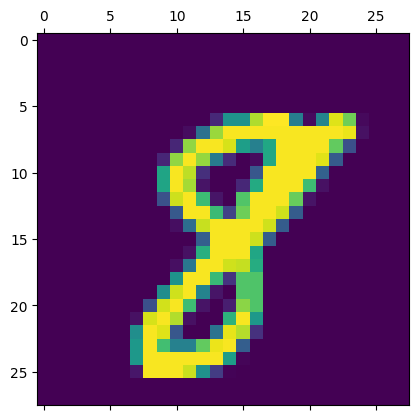

In [19]:
import matplotlib.pyplot as plt
plt.matshow(x_train[55])
y_train[55]

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Input
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

C:\Users\jayesh badgujar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [11]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7252 - loss: 1.0597 - val_accuracy: 0.9010 - val_loss: 0.3635
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8989 - loss: 0.3607 - val_accuracy: 0.9176 - val_loss: 0.2951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9160 - loss: 0.3010 - val_accuracy: 0.9274 - val_loss: 0.2621
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9272 - loss: 0.2601 - val_accuracy: 0.9327 - val_loss: 0.2379
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9347 - loss: 0.2359 - val_accuracy: 0.9377 - val_loss: 0.2194
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9386 - loss: 0.2202 - val_accuracy: 0.9426 - val_loss: 0.2040
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9439 - loss: 0.2014 - val_accuracy: 0.9464 - val_loss: 0.1907
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1864 - 

In [12]:
(test_loss,test_acc) = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 0.1881


In [13]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


randint: 5580
Actual: 9
predicted: 9


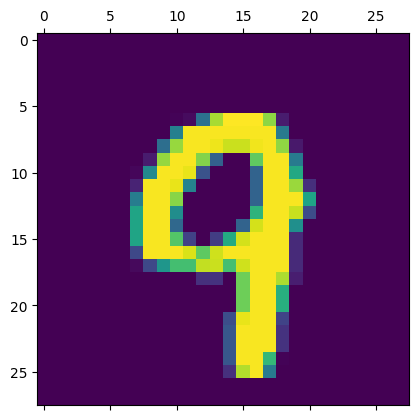

In [14]:
import random , numpy as np
predLabel = np.argmax(pred,axis=1)
n = random.randint(0,9999)    #9755
print("randint: " + str(n) )
plt.matshow(x_test[n])
print("Actual: "+str(y_test[n]))
print("predicted: " + str(predLabel[n]))
# print("Predicted: "+ pred[n])
# print("Predicted: "+ str(model.predict(x_test[n])))

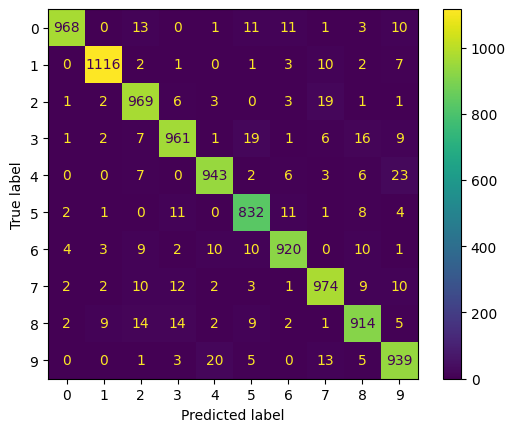

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(predLabel, y_test)
plt.show()